<a href="https://colab.research.google.com/github/RonnyGuevara/Computer_Graphics/blob/main/TP2/CG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Código HTML

In [ ]:
<doctype html>
<html>
	<head>
	<title>PSG 2022 - Ejemplo WebGL</title>

	<!-- Estilo -->
	<link href="style.css" rel="stylesheet">

	<!-- Shaders -->
	<script type="x-shader/x-vertex"   id="vertexShader"   src="vertex_shader.js">
	attribute vec3 pos;
	attribute vec4 clr;
	
	uniform mat4 trans;
	
	varying vec4 vcolor;
	
	void main()
	{
		gl_Position = trans * vec4(pos,1);
		vcolor = clr;
	}
	</script>

	<script type="x-shader/x-fragment" id="fragmentShader" src="fragment_shader.js">
	precision mediump float;

	varying vec4 vcolor;
	
	void main()
	{
		gl_FragColor = vcolor;
	}
	</script>

	<!-- Proyecto -->
	<script type="text/javascript" src="ejemplo_webgl.js"></script>	

	</head>

	<body>
		<canvas id="mycanvas"></canvas>
	</body>
</html>


#Código JAVA

In [ ]:
ang = 0

function init()
{
	/******* INICIALIZACIÓN DEL CANVAS *******/
	// Inicializamos el canvas y WebGL
	canvas = document.getElementById("mycanvas");
	gl     = canvas.getContext("webgl");

	// Seteamos la resolución del viewport y lo ajustamos a la del canvas
	const pixelRatio = window.devicePixelRatio || 1;
	canvas.width     = pixelRatio * canvas.clientWidth;
	canvas.height    = pixelRatio * canvas.clientHeight;
	gl.viewport(0, 0, canvas.width, canvas.height);

	// Inicializamos el color base (RGBA)
	gl.clearColor(.8, .8, .8, 1);
	
	/******* INICIALIZACIÓN DE LA ESCENA *******/
	// Inicialización de los buffers para los objetos de mi escena.
	// Este contenido podríamos modificarnlo en cualquier momento
	// sin necesidad de volver a crear los buffers.

	// Posiciones de los vértices
	var positions = [
		 0.0,  0.8, 0,
		 0.8, -0.8, 0,
		-0.8, -0.8, 0];

	// Colores para cada vértice	
	var colors = [
		1, 0, 0, 1,
		0, 1, 0, 1,
		0, 0, 1, 1];
	
	// Creación y binding de los buffers:
	// Buffer para los vértices
	var position_buffer = gl.createBuffer();

	gl.bindBuffer(
		gl.ARRAY_BUFFER, 
		position_buffer );

	gl.bufferData(
		gl.ARRAY_BUFFER,
		new Float32Array(positions),
		gl.STATIC_DRAW );

	// Buffer para los colores
	var color_buffer = gl.createBuffer();

	gl.bindBuffer(
		gl.ARRAY_BUFFER, 
		color_buffer );

	gl.bufferData(
		gl.ARRAY_BUFFER,
		new Float32Array(colors),
		gl.STATIC_DRAW );
	
	
    /******* COMPILAMOS LOS SHADERS *******/
 	// Compilación del vertex shader y del fragment shader.
	// En caso de que quisieramos cambiar el código de los shaders en algún
	// punto de mi aplicación, deberíamos volver a compilarlos. 
	// Una aplicación puede tener varios shader y vincular cada uno a 
	// diferentes objetos de la escena. 

	// Vertex shader
	const vs_source = document.getElementById('vertexShader').text;
	
	const vs = gl.createShader(gl.VERTEX_SHADER);
	gl.shaderSource(vs, vs_source);
	gl.compileShader(vs);

	// Verifico que la compilación haya sido exitosa
	if ( ! gl.getShaderParameter(vs, gl.COMPILE_STATUS) ) 
	{
		alert( gl.getShaderInfoLog(vs) );
		gl.deleteShader(vs);
	}

	// Fragment shader
	const fs_source = document.getElementById('fragmentShader').text;

	const fs = gl.createShader(gl.FRAGMENT_SHADER);
	gl.shaderSource(fs, fs_source);
	gl.compileShader(fs);

	// Verifico que la compilación haya sido exitosa
	if ( ! gl.getShaderParameter(fs, gl.COMPILE_STATUS) ) 
	{
		alert( gl.getShaderInfoLog(fs) );
		gl.deleteShader(fs);
	}
	
	// Creo mi "programa" con ambos shaders compilados
	prog = gl.createProgram();
	gl.attachShader(prog, vs);
	gl.attachShader(prog, fs);
	gl.linkProgram(prog);

	// Verifico si el link fue exitoso
	if ( ! gl.getProgramParameter(prog, gl.LINK_STATUS) ) 
	{
		alert( gl.getProgramInfoLog(prog) );
	}
	
	
    /******* SETEAMOS LAS VARIABLES UNIFORMES  *******/
  	// Actualizamos las variables uniformes para los shaders. 
	// Antes de reenderizar la escena, es necesario setear las variables
	// uniformes. Estas variables las podemos actualizar todas las veces
	// que lo necesitemos. 

	var m = gl.getUniformLocation(prog,'trans');


	// CUIDADO que la matriz se sube column-major
	ang = ang + 0.1
	var matrix = [
		1 ,  0,   0,  0,
		0,   1,   0,  0,
		0,   0,   1,  0,
		0,   0,   0,  1 ];


		// var matrix = [
		// 0.5 ,  0,   0,  0,
		// 0,   0.2,   0,  0,
		// 0,   0,   1,  0,
		// 0,   0,   0,  1 ];

	gl.useProgram(prog);
	gl.uniformMatrix4fv( m, false, matrix );
	
	
    /******* LINKEAMOS LOS BUFFERS DE LA ESCENA  *******/
	// Linkeamos los buffers que son necesarios para el rendering.
	// Antes de reenderizar, especificamos los buffers de vértices y 
	// de sus atributos. Es posible usar buffers diferentes para objetos
	// diferentes, cada uno con su propio set de atributos. 

	// Link atributo posición
	var p = gl.getAttribLocation(prog, 'pos');
	gl.bindBuffer(gl.ARRAY_BUFFER, position_buffer);
	gl.vertexAttribPointer(p, 3, gl.FLOAT, false, 0, 0);
	gl.enableVertexAttribArray(p);

	// Link atributo color
	var c = gl.getAttribLocation(prog, 'clr');
	gl.bindBuffer(gl.ARRAY_BUFFER, color_buffer);
	gl.vertexAttribPointer(c, 4, gl.FLOAT, false, 0, 0);
	gl.enableVertexAttribArray(c);


        /******* REENDERIZAMOS  *******/
	// Ahora que ya está todo seteado, renderizamos la escena. 
	// El primer paso es siempre limpiar la imagen. 
	// Cada vez que cambie la escena, tenemos que reenderizar nuevamente. 
	gl.clear( gl.COLOR_BUFFER_BIT );
	gl.useProgram( prog );
	gl.drawArrays( gl.TRIANGLES, 0, 3 );

}

window.onload = init

#Resultado

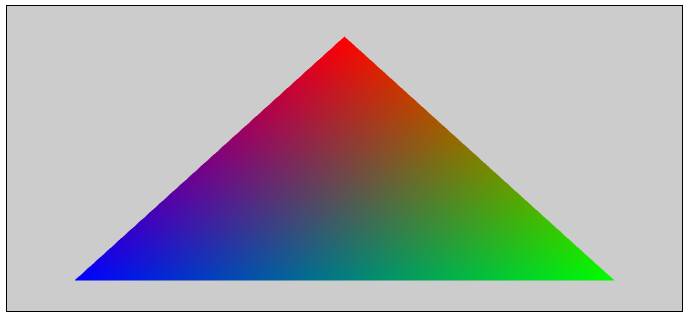

##Rotemos y traslademos la gráfica

In [ ]:
#Matriz de rotacion y traslación
	var matrix = [
       0.5 ,  0,   0,  -1,
		    0,   0.2,   0,  -1,
		    0,   0,   1,  0,
		    0,   0,   0,  1 ];

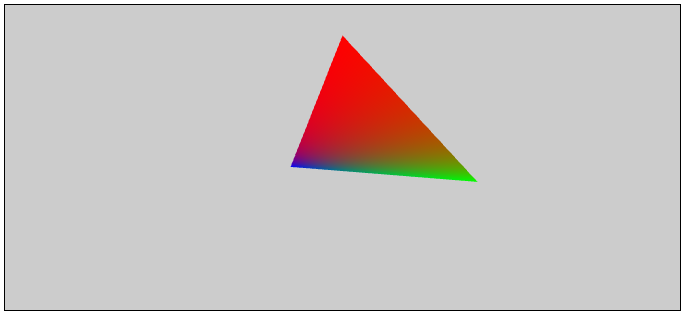